## Step 1: Define Regression Analysis Calculator

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm

class RegressionCalculator:
    def __init__(self, data):
        
        #Initialize the Regression Calculator with the provided data.
    
        self.data = data
        self.linear_regressor = LinearRegression()
        self.y = None
        self.x = None
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
       
        
    def scale_data(self):
        
        #Scale the non-binary numeric columns in the dataset.

        numeric_columns = self.data.select_dtypes(include=[np.number]).columns
        non_binary_columns = [col for col in numeric_columns if len(self.data[col].unique()) > 2]

        scaler = StandardScaler()
        scaled_data = self.data.copy()
        scaled_data[non_binary_columns] = scaler.fit_transform(scaled_data[non_binary_columns])

        self.data = scaled_data
        
        
    def correl_table(self):
       
        #Generate and display a correlation heatmap of the dataset.
        
        corr = self.data.corr()
        plt.figure(figsize=(14,6))
        sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(20, 220, n=200))
        plt.title('Correlation Heatmap')
        plt.show()
    
    def define_y_value(self, y_val):
       
        #Define the target variable (y) and the explanatory variables (X).
        
        #Input: y_val: The name of the target variable column.
   
        self.y = pd.DataFrame(self.data[y_val])
        
        explanatory_columns = [col for col in self.data.columns if col != y_val]
        self.x = pd.get_dummies(self.data[explanatory_columns], drop_first=True)
        
    def train_regression_model(self):
       
        #Split the data into training and test sets, train the linear regression model,and print model statistics.
       
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, self.y, test_size=0.2, random_state=0)
        self.linear_regressor.fit(self.x_train, self.y_train)
        
        #Print linear coeffeicents
        
        coeff_df = pd.DataFrame(self.linear_regressor.coef_, columns=self.x.columns)
        print()
        print('The Linear Coefficents Are:')
        print(coeff_df)
        
        #Print statisitcal summary
        x_train2 = sm.add_constant(self.x_train)
        est = sm.OLS(self.y_train, x_train2)
        est2 = est.fit()
        print()
        print('Summary Data For Regression:')
        print(est2.summary())
        
        
        
    def evaluate_model_accuracy(self):
        
        #Evaluate and display the accuracy of the model using various metrics.
        
        y_train_pred = self.linear_regressor.predict(self.x_train)
        y_test_pred = self.linear_regressor.predict(self.x_test)
        
        plt.figure(figsize=(15,8))
        plt.scatter(y_train_pred, y_train_pred - self.y_train, c='steelblue', marker='o', label='Training Data')
        plt.scatter(y_test_pred, y_test_pred - self.y_test, color='limegreen', marker='s', label='Test Data')
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.legend(loc='upper right')
        plt.hlines(y=0, xmin=self.x_train.values.min(), xmax=self.x_train.values.max(), color='black', lw=2)
        plt.title("Residuals Plot")
        plt.show()
        
        print('Mean Absolute Error on Test Data:', metrics.mean_absolute_error(self.y_test, y_test_pred))
        print('Mean Absolute Error on Training Data:', metrics.mean_absolute_error(self.y_train, y_train_pred))
        print('Mean Squared Error on Test Data:', metrics.mean_squared_error(self.y_test, y_test_pred))
        print('Mean Squared Error on Training Data:', metrics.mean_squared_error(self.y_train, y_train_pred))
        print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(self.y_test, y_test_pred)))
        print('Root Mean Squared Error on Training Data:', np.sqrt(metrics.mean_squared_error(self.y_train, y_train_pred)))
        
        r_sq_test = r2_score(self.y_test, y_test_pred)
        r_sq_train = r2_score(self.y_train, y_train_pred)
        print('R squared on test set:', r_sq_test)
        print('R squared on training set:', r_sq_train)
        
    def predict_values(self, x_vals):
     
        #Predict values based on new input data.
        
        #Input: x_vals: The new input data for prediction.
        
        #Returns: The predicted values.
        
        y_pred = self.linear_regressor.predict(x_vals)
        print(f"The predicted values are: {y_pred}. Keep in mind this model was trained on data from 2021.")
        return y_pred


## Step 2: Prepare Data
- Read Data
- Preprocess Data 
- Change Any Columns with 0/1s to Object Data Types

In [56]:
import pandas as pd
import os 

data = pd.read_csv(os.path.join(os.getcwd(),'data_clean.csv'))

In [57]:
data.head()
data.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
max_mpg                float64
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
price_drop             float64
price                  float64
dtype: object

In [58]:
# Convert year to float
data['year'] = data['year'].astype(float)

# Create a new df with only float columns
numeric_df = data.select_dtypes(include=['float64'])

In [59]:
numeric_df

,year,mileage,max_mpg,accidents_or_damage,one_owner,personal_use_only,seller_rating,price_drop,price
0,2013.0,92945.0,38.0,0.0,0.0,0.0,0.0,300.0,13988.0
1,2013.0,47645.0,38.0,1.0,1.0,1.0,0.0,0.0,17995.0
2,2013.0,53422.0,38.0,0.0,1.0,1.0,4.3,500.0,17000.0
3,2013.0,62042.0,38.0,0.0,0.0,1.0,2.2,109.0,18000.0
4,2013.0,57212.0,38.0,0.0,1.0,1.0,0.0,0.0,15999.0
...,...,...,...,...,...,...,...,...,...
565076,2020.0,26781.0,34.0,1.0,1.0,1.0,5.0,1108.0,30883.0
565077,2022.0,22877.0,33.0,0.0,1.0,0.0,4.2,250.0,34798.0
565078,2014.0,92000.0,30.0,0.0,0.0,1.0,0.0,300.0,12299.0
565079,2013.0,132000.0,29.0,1.0,0.0,0.0,4.6,1000.0,8995.0


In [60]:
#change 0 and 1 Columns to objects so that pandas will treat them correctly
numeric_df['accidents_or_damage'] = numeric_df['accidents_or_damage'].astype(object)
numeric_df['one_owner'] = numeric_df['one_owner'].astype(object)
numeric_df['personal_use_only'] = numeric_df['personal_use_only'].astype(object)

## Step 3: Explore Data, and Perform Regressions

- 1. Perform Analysis On: Price = 𝑓(Year, Mileage, Max MPG, Accidents or Damage, One Owner, Personal Use Only, Seller Rating, Price Drop)

- 2. Perform Analysis On: Price = 𝑓(Year, Mileage)
       
- 3. Perform Analysis On: Price = 𝑓(Mileage)

- 4. Perform Analysis On: Price = 𝑓(Manufacturer, Year, Mileage)

- 5. Perform Analysis On: Price Price = 𝑓(Manufacturer, Year, Mileage)+(Excluding Models with < 100 Rows)

- 6. Perform Analysis On: Price = 𝑓(Accidents or Damage, Year, Mileage)+(Controls: Make, Model)

#### 1. Regression Analysis: 𝑓(Year, Mileage, Max MPG, Accidents or Damage, One Owner, Personal Use Only, Seller Rating, Price Drop)


C:\Users\12034\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)



The Linear Coefficents Are:
       year   mileage  max_mpg  seller_rating  price_drop  \
0  0.243546 -0.356755 -0.36886        0.01346    0.117082   

   accidents_or_damage_1.0  one_owner_1.0  personal_use_only_1.0  
0                -0.121816      -0.034762               0.070592  

Summary Data For Regression:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                 5.031e+04
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:48:04   Log-Likelihood:            -4.9764e+05
No. Observations:              452064   AIC:                         9.953e+05
Df Residuals:                  452055   BIC:                         9.954e+05
Df Model:                           8               

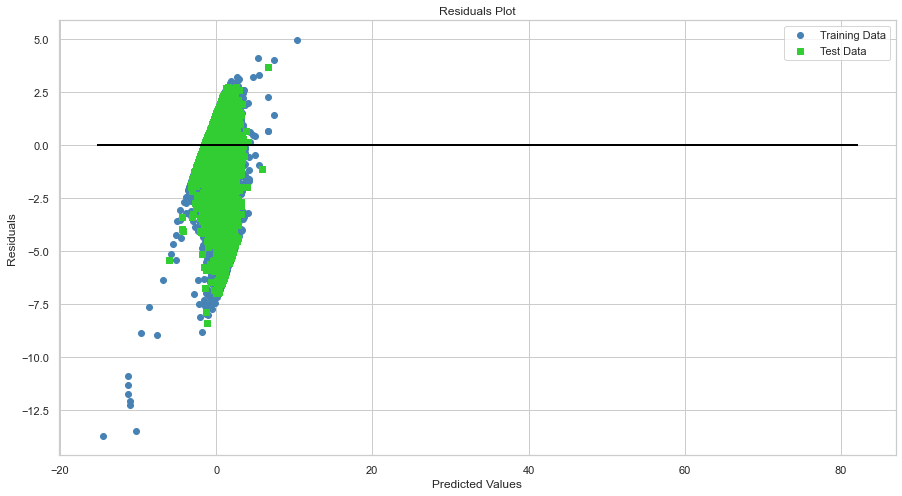

Mean Absolute Error on Test Data: 0.46298660370963296
Mean Absolute Error on Training Data: 0.46305040804300246
Mean Squared Error on Test Data: 0.5245179427121704
Mean Squared Error on Training Data: 0.5292858564418192
Root Mean Squared Error on Test Data: 0.7242361097820037
Root Mean Squared Error on Training Data: 0.7275203477854205
R squared on test set: 0.47428582122248564
R squared on training set: 0.4710150003490571


In [61]:
#Initilaize regression
Regression_01 = RegressionCalculator(numeric_df)

#Perform data scaling
Regression_01.scale_data()

#Display correlation heatmap
#Regression_01.correl_table()

#Define target variable and explanatory variables
Regression_01.define_y_value('price')

#Train the linear regression model
Regression_01.train_regression_model()

#Evaluate model accuracy
Regression_01.evaluate_model_accuracy()

#### 2. Regression Analysis: Price = 𝑓(Year, Mileage)


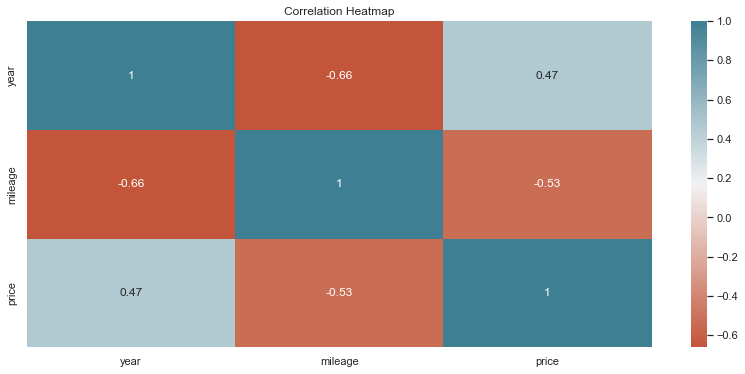


The Linear Coefficents Are:
       year   mileage
0  0.198929 -0.403637

Summary Data For Regression:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                 1.009e+05
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:48:06   Log-Likelihood:            -5.5814e+05
No. Observations:              452064   AIC:                         1.116e+06
Df Residuals:                  452061   BIC:                         1.116e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

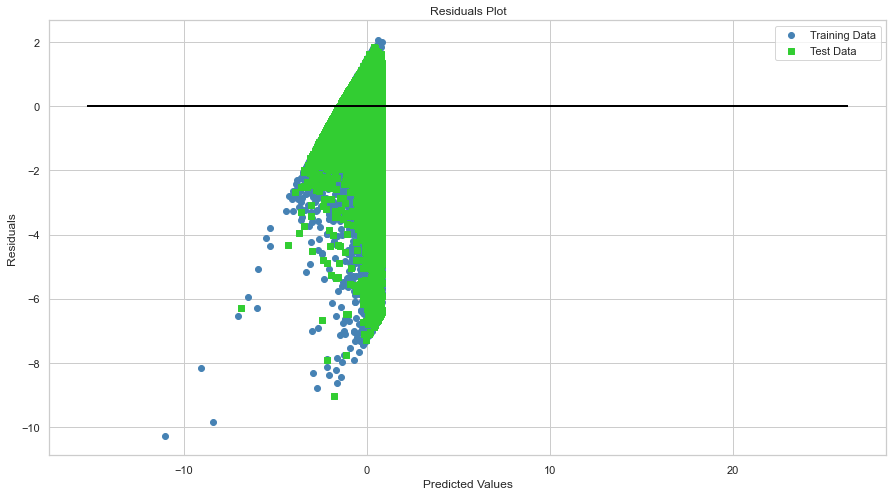

Mean Absolute Error on Test Data: 0.5608765771270486
Mean Absolute Error on Training Data: 0.5598139495327402
Mean Squared Error on Test Data: 0.6935068612900647
Mean Squared Error on Training Data: 0.6917234648095896
Root Mean Squared Error on Test Data: 0.8327705934349896
Root Mean Squared Error on Training Data: 0.831699143205997
R squared on test set: 0.30491149992986055
R squared on training set: 0.3086697248048005


In [62]:
#Initilaize regression
Regression_02 = RegressionCalculator(numeric_df[['year','mileage', 'price']])

#Perform data scaling
Regression_02.scale_data()

#Display correlation heatmap
Regression_02.correl_table()

#Define target variable and explanatory variables
Regression_02.define_y_value('price')

#Train the linear regression model
Regression_02.train_regression_model()

#Evaluate model accuracy
Regression_02.evaluate_model_accuracy()

#### 3. Regression Analysis: Price = 𝑓(Mileage)


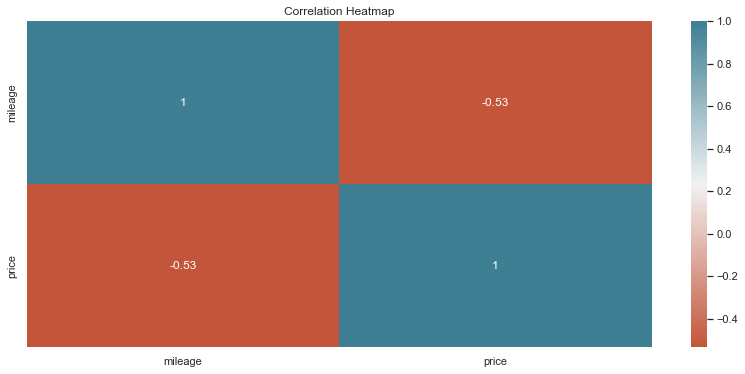


The Linear Coefficents Are:
    mileage
0 -0.535174

Summary Data For Regression:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                 1.815e+05
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:48:07   Log-Likelihood:            -5.6529e+05
No. Observations:              452064   AIC:                         1.131e+06
Df Residuals:                  452062   BIC:                         1.131e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

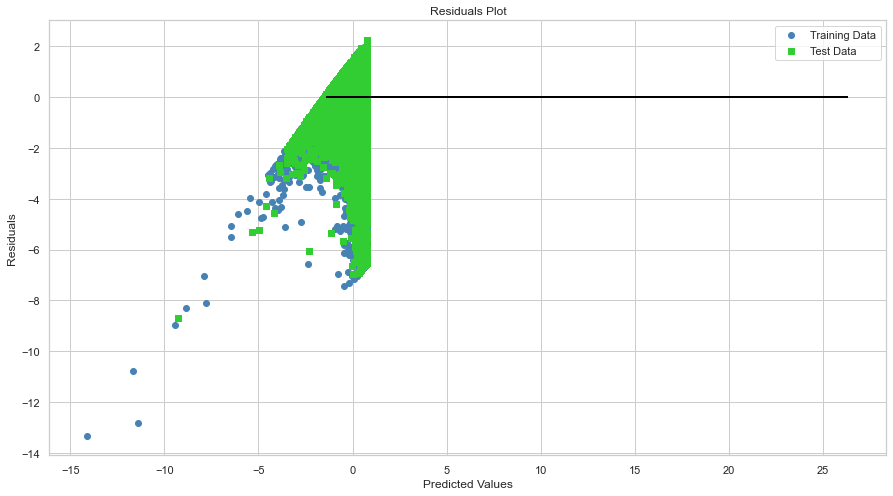

Mean Absolute Error on Test Data: 0.5786757265402439
Mean Absolute Error on Training Data: 0.5770676079651883
Mean Squared Error on Test Data: 0.7154801666856838
Mean Squared Error on Training Data: 0.7139306192563697
Root Mean Squared Error on Test Data: 0.8458606071248879
Root Mean Squared Error on Training Data: 0.8449441515605453
R squared on test set: 0.28288808135745824
R squared on training set: 0.28647519335396876


In [63]:
#Initilaize regression
Regression_03 = RegressionCalculator(numeric_df[['mileage', 'price']])

#Perform data scaling
Regression_03.scale_data()

#Display correlation heatmap
Regression_03.correl_table()

#Define target variable and explanatory variables
Regression_03.define_y_value('price')

#Train the linear regression model
Regression_03.train_regression_model()

#Evaluate model accuracy
Regression_03.evaluate_model_accuracy()

#### 4. Regression Analysis: Price = 𝑓(Manufacturer, Year, Mileage)

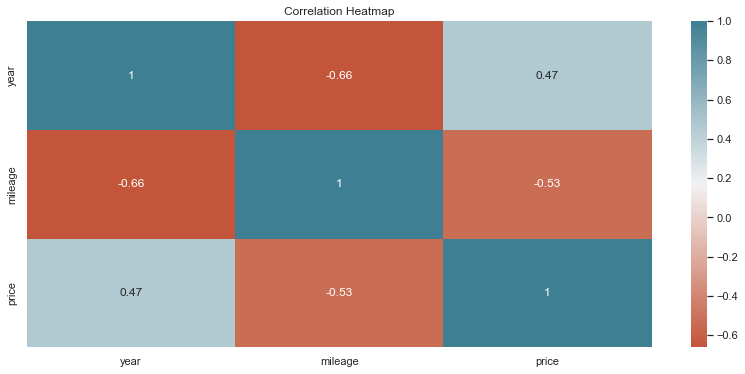


The Linear Coefficents Are:
       year   mileage  manufacturer_Audi  manufacturer_BMW  \
0  0.269597 -0.338464            0.37962          0.427223   

   manufacturer_Buick  manufacturer_Cadillac  manufacturer_Chevrolet  \
0           -0.353252               0.460555                0.025992   

   manufacturer_Chrysler  manufacturer_Dodge  manufacturer_Ford  ...  \
0              -0.210928            0.063382           0.067836  ...   

   manufacturer_Mercedes-Benz  manufacturer_Mitsubishi  manufacturer_Nissan  \
0                    0.706003                -0.602333            -0.365257   

   manufacturer_Porsche  manufacturer_RAM  manufacturer_Subaru  \
0              2.318334           0.43399            -0.239921   

   manufacturer_Tesla  manufacturer_Toyota  manufacturer_Volkswagen  \
0            1.027895             0.147001                -0.339664   

   manufacturer_Volvo  
0            0.188321  

[1 rows x 31 columns]

Summary Data For Regression:
                    

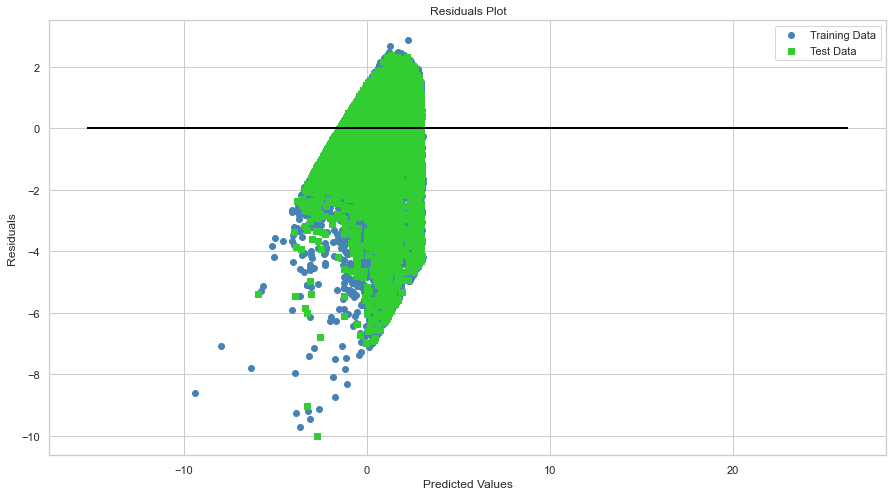

Mean Absolute Error on Test Data: 0.47558717358158703
Mean Absolute Error on Training Data: 0.4750956654439068
Mean Squared Error on Test Data: 0.49874714424060035
Mean Squared Error on Training Data: 0.49782960467820864
Root Mean Squared Error on Test Data: 0.7062203227326443
Root Mean Squared Error on Training Data: 0.7055704108579162
R squared on test set: 0.5001153935815704
R squared on training set: 0.5024533717426495


In [64]:
data_make = data[['manufacturer','year','mileage','price']]

#Initilaize regression
Regression_04 = RegressionCalculator(data_make)

#Perform data scaling
Regression_04.scale_data()

#Display correlation heatmap
Regression_04.correl_table()

#Define target variable and explanatory variables
Regression_04.define_y_value('price')

#Train the linear regression model
Regression_04.train_regression_model()

#Evaluate model accuracy
Regression_04.evaluate_model_accuracy()

#### 5. Regression Analysis: Price = 𝑓(Manufacturer, Year, Mileage) + (Excluding Models with < 100 Rows) 


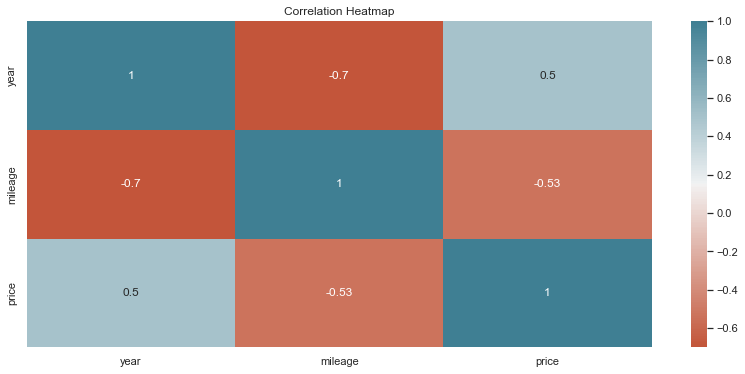


The Linear Coefficents Are:
       year   mileage  manufacturer_Audi  manufacturer_BMW  \
0  0.324086 -0.290389           0.357466           0.50733   

   manufacturer_Buick  manufacturer_Cadillac  manufacturer_Chevrolet  \
0           -0.336327               0.543066                0.036741   

   manufacturer_Chrysler  manufacturer_Dodge  manufacturer_Ford  ...  \
0              -0.205703            0.049838           0.076209  ...   

   manufacturer_Mercedes-Benz  manufacturer_Mitsubishi  manufacturer_Nissan  \
0                    0.690549                -0.692667            -0.386851   

   manufacturer_Porsche  manufacturer_RAM  manufacturer_Subaru  \
0              2.604014          0.370559            -0.223727   

   manufacturer_Tesla  manufacturer_Toyota  manufacturer_Volkswagen  \
0            1.079043             0.209296                -0.401479   

   manufacturer_Volvo  
0            0.379467  

[1 rows x 31 columns]

Summary Data For Regression:
                    

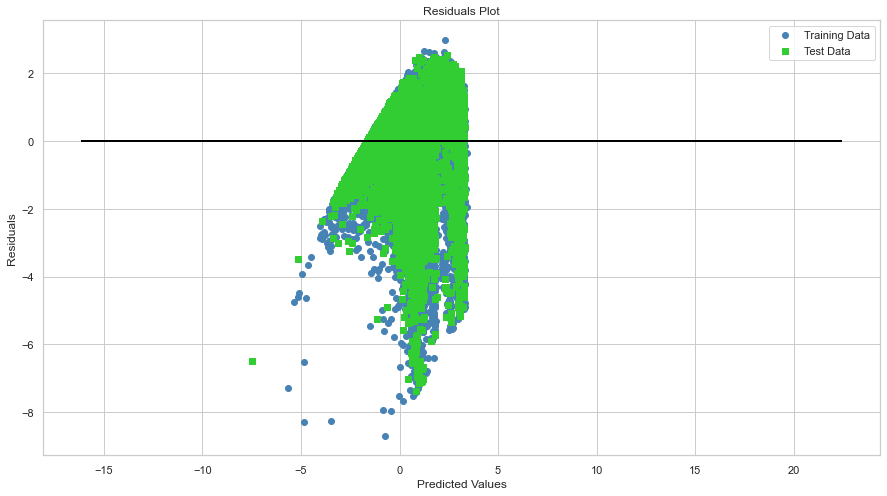

Mean Absolute Error on Test Data: 0.48161351931434637
Mean Absolute Error on Training Data: 0.48206803010059407
Mean Squared Error on Test Data: 0.47472469980256826
Mean Squared Error on Training Data: 0.47966767810470995
Root Mean Squared Error on Test Data: 0.6890026849022929
Root Mean Squared Error on Training Data: 0.692580448832271
R squared on test set: 0.5223043766808926
R squared on training set: 0.5210769612846856


In [65]:
#Remove Models with less than 100 instances
value_counts_df = data['model'].value_counts().reset_index()
value_counts_df.columns = ['model', 'count']
filtered_df = value_counts_df[value_counts_df['count'] > 100]
filtered_data = data[data['model'].isin(filtered_df['model'])]


filtered_data = filtered_data[['manufacturer', 'year', 'mileage', 'price']]

#Initilaize regression
Regression_05 = RegressionCalculator(filtered_data)

#Perform data scaling
Regression_05.scale_data()

#Display correlation heatmap
Regression_05.correl_table()

#Define target variable and explanatory variables
Regression_05.define_y_value('price')

#Train the linear regression model
Regression_05.train_regression_model()

#Evaluate model accuracy
Regression_05.evaluate_model_accuracy()

#### 6. Regression Analysis: Price = 𝑓(Accidents or Damage, Year, Mileage)+Controls: Make, Model

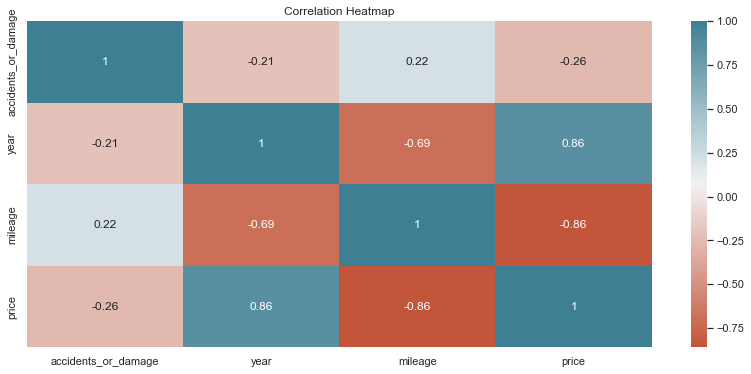


The Linear Coefficents Are:
   accidents_or_damage      year   mileage
0            -0.102869  0.503328 -0.493292

Summary Data For Regression:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     2965.
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:48:14   Log-Likelihood:                -441.83
No. Observations:                1218   AIC:                             891.7
Df Residuals:                    1214   BIC:                             912.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|  

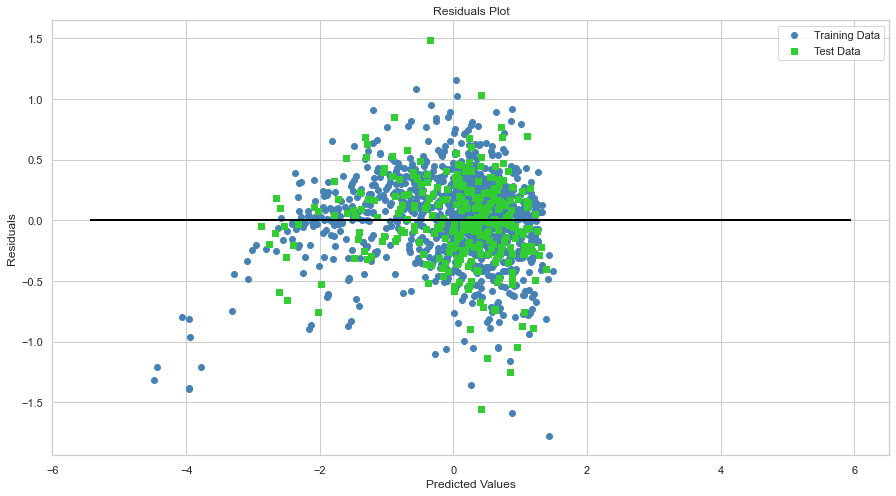

Mean Absolute Error on Test Data: 0.2685641183452843
Mean Absolute Error on Training Data: 0.26183022440390147
Mean Squared Error on Test Data: 0.1279571561757157
Mean Squared Error on Training Data: 0.12095018537628222
Root Mean Squared Error on Test Data: 0.3577109953240405
Root Mean Squared Error on Training Data: 0.3477789317602235
R squared on test set: 0.8679212693324238
R squared on training set: 0.8799128061324074


In [66]:
#Filter data for only one specific make/model
toyota_df = data[data['manufacturer'] == 'Toyota']
toyota_df = toyota_df[toyota_df['model'] == 'Camry SE']
toyota_df.select_dtypes(include=['float64'])

#Initilaize regression
Regression_06 = RegressionCalculator(toyota_df[['accidents_or_damage','year','mileage', 'price']])

#Perform data scaling
Regression_06.scale_data()

#Display correlation heatmap
Regression_06.correl_table()

#Define target variable and explanatory variables
Regression_06.define_y_value('price')

#Train the linear regression model
Regression_06.train_regression_model()

#Evaluate model accuracy
Regression_06.evaluate_model_accuracy()

## Step 4: Devolop The Best Model To Predict Values Based On Above Exploration
- Filter the data by a specific make/model, and filter out models with less than 300 observations
- Perform Analysis On: Price = 𝑓(Accidents or Damage, Year, Mileage)
- Visualize Linear Relationship Of Mileage, Year, and Price
- Visualize Actual Market Relationship of Mileage, Year, and Price

#### Filter the data set
- Filter By Make and Model
- Remove Modes with less than 300 observations

In [67]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

#Define all unqiue models for dropdown
def update_models(*args): 
    selected_make = make_dropdown.value 
    models = data[data['manufacturer'] == selected_make]['model'].unique() #models are every unique value when filtered by make
    model_dropdown.options = models

#What to do when clicking filter button    
def on_select_button_clicked(b):
    global df, selected_make, selected_model
    with output_area:
        clear_output()
        selected_make = make_dropdown.value
        selected_model = model_dropdown.value
        df = data[(data['manufacturer'] == selected_make) & (data['model'] == selected_model)]

#Filter out models with less than 300 observations
data = data.groupby('model').filter(lambda x: len(x) >= 200)

#Define make button
make_dropdown = widgets.Dropdown(
    options=data['manufacturer'].unique(),
    description='Make:',
    disabled=False
)

#Define model button
model_dropdown = widgets.Dropdown(
    options=[],
    description='Model:',
    disabled=False
)

#Define filter button
select_button = widgets.Button(
    description='Filter Data Set',
    disabled=False,
    button_style='',
    tooltip='Click to select make and model',
    icon='check'
)



output_area = widgets.Output()


make_dropdown.observe(update_models, 'value')

select_button.on_click(on_select_button_clicked)

#Initial update of the model dropdown
update_models()

#Display the widgets
display(make_dropdown, model_dropdown, select_button, output_area)

Dropdown(description='Make:', options=('Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', '…

Dropdown(description='Model:', options=('RDX Technology Package', 'RDX Advance Package', 'RDX Base', 'RDX A-Sp…

Button(description='Filter Data Set', icon='check', style=ButtonStyle(), tooltip='Click to select make and mod…

Output()

In [76]:
df.head()

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,max_mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,price_drop,price
496561,Toyota,Camry SE,2019.0,15111.0,2.5L I4 16V PDI DOHC,8-Speed Automatic,Front-wheel Drive,Gasoline,28-39,39.0,Celestial Silver Metallic,Black,0.0,1.0,1.0,Mount Airy Toyota,4.2,484.0,27707.0
496562,Toyota,Camry SE,2021.0,37555.0,2.5L I4 16V PDI DOHC,8-Speed Automatic,Front-wheel Drive,Gasoline,28-39,39.0,Predawn Gray Mica,Black,0.0,1.0,0.0,Bob Rohrman Toyota,4.6,300.0,25672.0
496566,Toyota,Camry SE,2021.0,65204.0,2.5L I4 16V PDI DOHC,8-Speed Automatic,Front-wheel Drive,Gasoline,28-39,39.0,Blueprint,Black,0.0,1.0,0.0,Toyota of Somerset,4.1,0.0,24500.0
496569,Toyota,Camry SE,2018.0,49129.0,2.5L I4 16V PDI DOHC,8-Speed Automatic,Front-wheel Drive,Gasoline,28-39,39.0,Ruby Flare Pearl,Black,0.0,1.0,1.0,Shively Motors of Chambersburg,4.6,0.0,21995.0
496573,Toyota,Camry SE,2014.0,127830.0,2.5L I4 16V MPFI DOHC,6-Speed Automatic,Front-wheel Drive,Gasoline,25-35,35.0,Midnight Black,Black,0.0,1.0,1.0,O'Brien Toyota,4.5,500.0,13960.0


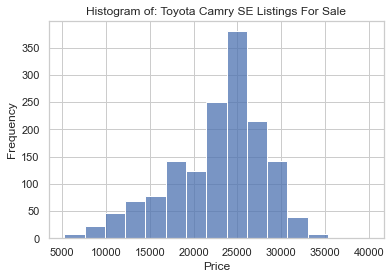

Descriptive Stats of: Toyota Camry SE Prices
Mean: 22786.65134602758
Median: 23900.0
Mode: 24998.0
Range: 34754.0
Variance: 28833103.438807365
Standard Deviation: 5369.646491046442


In [77]:
sns.histplot(df['price'], bins = 15, kde = False) #Create Hisogram for data set
title = f'Histogram of: {selected_make} {selected_model} Listings For Sale'
plt.title(title)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Descriptive statistics for 'price'
mean = df['price'].mean()
median = df['price'].median()
mode = df['price'].mode()[0]
range_value = df['price'].max() - df['price'].min()
variance = df['price'].var()
std_dev = df['price'].std()

# Display results
print(f'Descriptive Stats of: {selected_make} {selected_model} Prices')
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')
print(f'Range: {range_value}')
print(f'Variance: {variance}')
print(f'Standard Deviation: {std_dev}')

#### Regression Analysis: Price = 𝑓(Accidents or Damage, Year, Mileage)

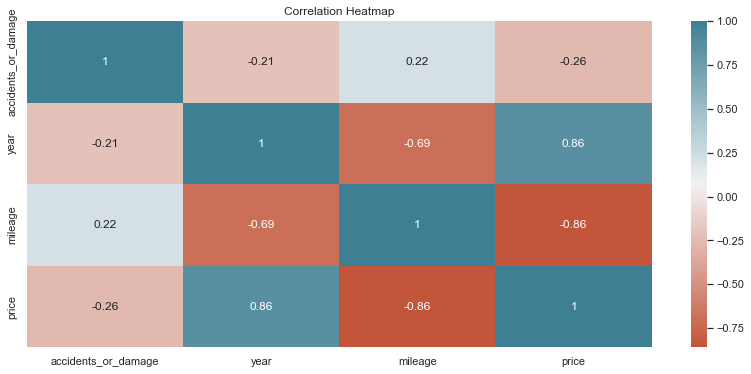


The Linear Coefficents Are:
   accidents_or_damage       year   mileage
0          -552.190107  874.22029 -0.067938

Summary Data For Regression:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     2965.
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:48:33   Log-Likelihood:                -10902.
No. Observations:                1218   AIC:                         2.181e+04
Df Residuals:                    1214   BIC:                         2.183e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|

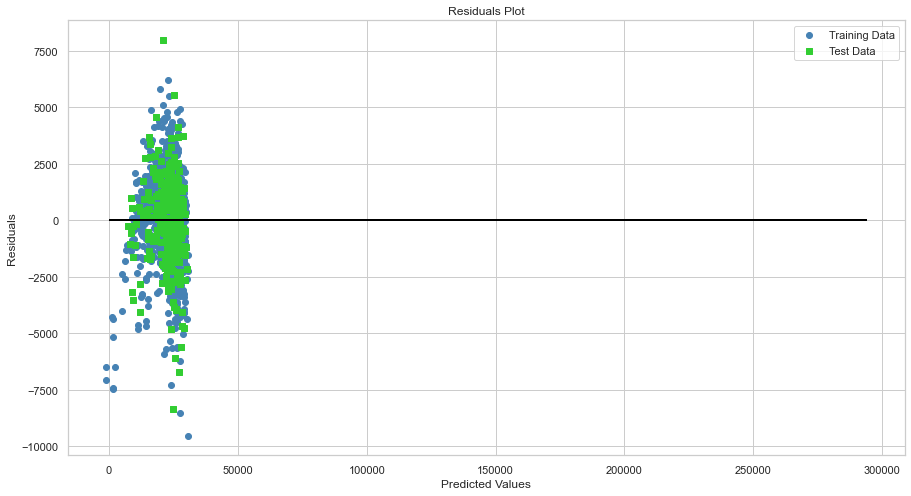

Mean Absolute Error on Test Data: 1441.6208592222094
Mean Absolute Error on Training Data: 1405.4741020547851
Mean Squared Error on Test Data: 3686979.462810452
Mean Squared Error on Training Data: 3485079.4033983
Root Mean Squared Error on Test Data: 1920.1508958439833
Root Mean Squared Error on Training Data: 1866.8367372103808
R squared on test set: 0.8679212693324058
R squared on training set: 0.879912806132408


In [78]:
#Initilaize regression
Regression_07 = RegressionCalculator(df[['accidents_or_damage','year','mileage', 'price']])

#Perform data scaling
#Regression_07.scale_data()

#Display correlation heatmap
Regression_07.correl_table()

#Define target variable and explanatory variables
Regression_07.define_y_value('price')

# rain the linear regression model
Regression_07.train_regression_model()

#Evaluate model accuracy
Regression_07.evaluate_model_accuracy()

#### Visualize Linear Relationship By Mileage, Year, and Price
- Create a table of predictions and use linear regression to visually model the impact of year and mileage, and accidents on price.

- Note: The top of the confidence interval (CI) represents the predicted price assuming no accidents or damage, while the bottom represents the predicted price if there is an accident or damage.

In [79]:
import itertools
accidents_or_damage = [0,1]
year = df['year'].unique()
mileage = list(range(0,100000,5000))

#Generate Cartesian product
combinations = list(itertools.product(accidents_or_damage, year, mileage))

predictions = pd.DataFrame(combinations, columns= ['accidents_or_damage','year','mileage'])

predictions

,accidents_or_damage,year,mileage
0,0,2019.0,0
1,0,2019.0,5000
2,0,2019.0,10000
3,0,2019.0,15000
4,0,2019.0,20000
...,...,...,...
795,1,2004.0,75000
796,1,2004.0,80000
797,1,2004.0,85000
798,1,2004.0,90000


In [80]:
results = Regression_07.predict_values(predictions)
predictions['Predicted Price'] = results

The predicted values are: [[27324.91196326]
 [26985.22044566]
 [26645.52892805]
 [26305.83741045]
 [25966.14589284]
 [25626.45437524]
 [25286.76285763]
 [24947.07134003]
 [24607.37982242]
 [24267.68830481]
 [23927.99678721]
 [23588.3052696 ]
 [23248.613752  ]
 [22908.92223439]
 [22569.23071679]
 [22229.53919918]
 [21889.84768158]
 [21550.15616397]
 [21210.46464637]
 [20870.77312876]
 [29073.35254424]
 [28733.66102664]
 [28393.96950903]
 [28054.27799143]
 [27714.58647382]
 [27374.89495622]
 [27035.20343861]
 [26695.51192101]
 [26355.8204034 ]
 [26016.1288858 ]
 [25676.43736819]
 [25336.74585058]
 [24997.05433298]
 [24657.36281537]
 [24317.67129777]
 [23977.97978016]
 [23638.28826256]
 [23298.59674495]
 [22958.90522735]
 [22619.21370974]
 [26450.69167277]
 [26111.00015517]
 [25771.30863756]
 [25431.61711996]
 [25091.92560235]
 [24752.23408475]
 [24412.54256714]
 [24072.85104953]
 [23733.15953193]
 [23393.46801432]
 [23053.77649672]
 [22714.08497911]
 [22374.39346151]
 [22034.7019439 ]
 [

In [81]:
#Display all rows
pd.set_option('display.max_rows', None)  # or use a specific number if preferred
display(predictions)
#Reset option to default to avoid affecting other parts of code
pd.reset_option('display.max_rows')

,accidents_or_damage,year,mileage,Predicted Price
0,0,2019.0,0,27324.911963
1,0,2019.0,5000,26985.220446
2,0,2019.0,10000,26645.528928
3,0,2019.0,15000,26305.837410
4,0,2019.0,20000,25966.145893
5,0,2019.0,25000,25626.454375
6,0,2019.0,30000,25286.762858
7,0,2019.0,35000,24947.071340
8,0,2019.0,40000,24607.379822
9,0,2019.0,45000,24267.688305


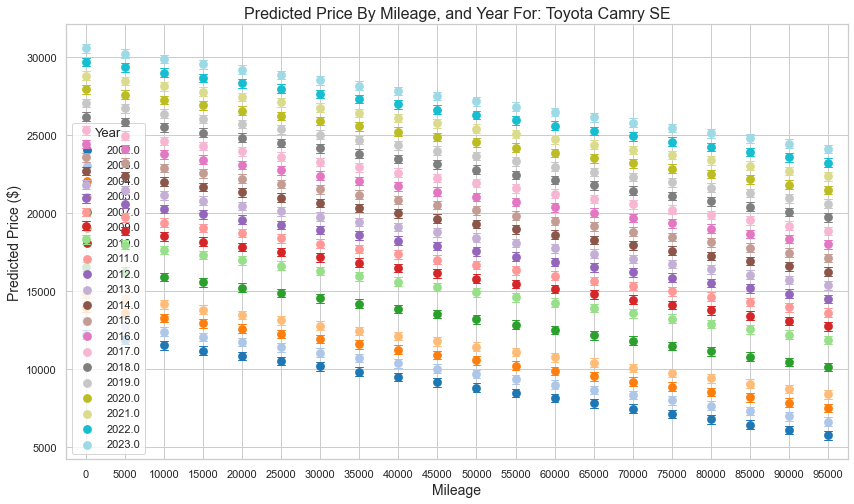

In [82]:
plt.figure(figsize=(14, 8))  #Larger figure for better readability


sns.set(style='whitegrid')

#Create the line plot with enhanced visuals
sns.pointplot(
    x='mileage',
    y='Predicted Price',
    hue='year',       # Color by year
    style='year',     # Different markers for each year (year is the legend)  
    markersize=3,     # Size the markers
    data=predictions,
    palette='tab20',  # Use a color palette for better distinction
    ci=95,            # Set the CI - (confidence interval 95%)
    capsize=0.2,      # Adjust the width of the caps at the end of CI lines
    errwidth=1,       # Confidence interval
    join=False        # Do not join the points with lines
)


#Customize the plot
plt.title(f'Predicted Price By Mileage, and Year For: {selected_make} {selected_model}', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Predicted Price ($)', fontsize=14)
plt.legend(title='Year', title_fontsize='13', fontsize='11')
plt.grid(True)

#Show the plot
plt.show()


##### Visualizing the Relationship Between Mileage, Year, and Price in Actual Car Listings

<Figure size 1008x576 with 0 Axes>

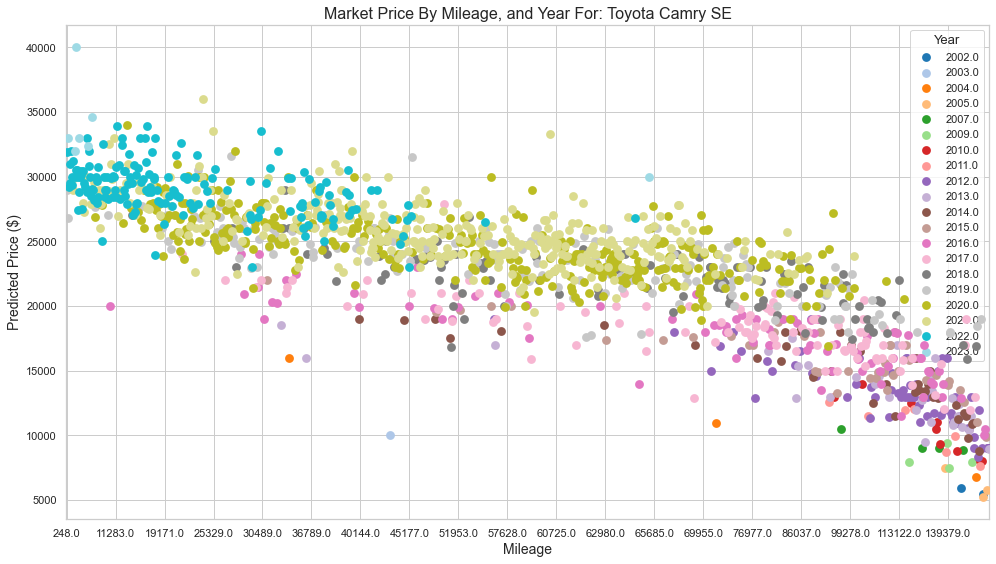

In [83]:
import matplotlib.ticker as ticker

plt.figure(figsize=(14, 8))  # Larger figure for better readability

#Create the plot
plt.figure(figsize=(14, 8))  # Larger figure for better readability

sns.set(style='whitegrid')

#Create the point plot with enhanced visuals
ax = sns.pointplot(
    x='mileage',
    y='price',
    hue='year',           # Color by year
    style='year',         # Different markers for each year        
    data=df,
    palette='tab20',      # Use a color palette for better distinction
    ci=None,              # No confidence interval
    join=False,           # Do not join the points with lines
    markersize=3,         # Adjust the size of the markers
    alpha=0.5
)

#Set x-axis ticks
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))  

#Customize the plot
plt.title(f'Market Price By Mileage, and Year For: {selected_make} {selected_model}', fontsize=16)
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Predicted Price ($)', fontsize=14)
plt.legend(title='Year', title_fontsize='13', fontsize='11')
plt.grid(True) 
plt.tight_layout()  

#Show the plot
plt.show()